In [12]:
import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [8]:
WORKING_DIR = '/opt/ml/TVControlHandGestureRecognition/'
DATASET_PATH = os.path.join(WORKING_DIR, 'dataset/finger_language/')

In [3]:
df = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))

In [4]:
df.head()

,person_id,camera_id,label,path
0,1,1,22,./train/1/1/22.mov
1,1,1,24,./train/1/1/24.mov
2,1,1,25,./train/1/1/25.mov
3,1,1,27,./train/1/1/27.mov
4,1,1,28,./train/1/1/28.mov


<AxesSubplot: >

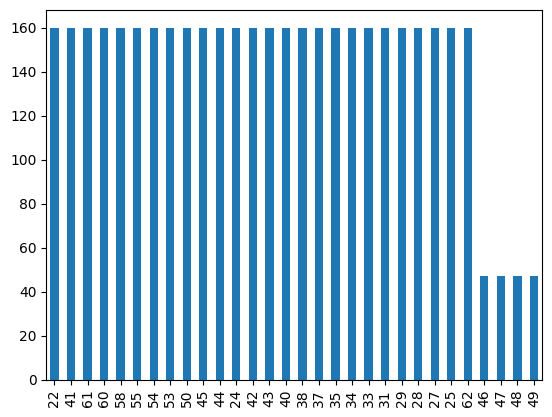

In [5]:
df.label.value_counts().plot(kind='bar')

In [6]:
import cv2

In [13]:
video_df = df.copy()

width = []
height = []
fps = []
frame_count = []

for _, row in tqdm(video_df.iterrows()):
    video_path = os.path.join(WORKING_DIR, DATASET_PATH, row['path'])
    video = cv2.VideoCapture(video_path)

    width.append(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height.append(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps.append(video.get(cv2.CAP_PROP_FPS))
    frame_count.append(video.get(cv2.CAP_PROP_FRAME_COUNT))

4348it [01:08, 63.14it/s]


In [15]:
video_df['width'] = width
video_df['height'] = height
video_df['width_height'] = video_df[['width', 'height']].apply(tuple, axis=1)
video_df['fps'] = fps
video_df['frame_count'] = frame_count

In [16]:
video_df.head()

,person_id,camera_id,label,path,width,height,width_height,fps,frame_count
0,1,1,22,./train/1/1/22.mov,1920.0,1080.0,"(1920.0, 1080.0)",30.0,31.0
1,1,1,24,./train/1/1/24.mov,1920.0,1080.0,"(1920.0, 1080.0)",30.0,34.0
2,1,1,25,./train/1/1/25.mov,1920.0,1080.0,"(1920.0, 1080.0)",30.0,35.0
3,1,1,27,./train/1/1/27.mov,1920.0,1080.0,"(1920.0, 1080.0)",30.0,36.0
4,1,1,28,./train/1/1/28.mov,1920.0,1080.0,"(1920.0, 1080.0)",30.0,31.0


In [17]:
video_df.fps.value_counts()

30.0    4348
Name: fps, dtype: int64

In [18]:
video_df.frame_count.value_counts()

18.0    304
19.0    263
14.0    261
16.0    256
13.0    253
20.0    251
17.0    249
15.0    244
21.0    206
12.0    189
22.0    188
24.0    177
11.0    174
23.0    165
25.0    155
10.0    128
9.0     128
26.0    119
27.0    110
28.0     76
8.0      74
29.0     60
31.0     47
30.0     47
7.0      42
6.0      34
34.0     28
32.0     24
33.0     19
4.0      12
35.0     11
36.0     10
5.0      10
37.0      6
41.0      5
38.0      5
40.0      3
42.0      3
39.0      3
43.0      2
48.0      1
47.0      1
44.0      1
70.0      1
71.0      1
74.0      1
62.0      1
Name: frame_count, dtype: int64

In [19]:
video_df.width_height.value_counts()

(1920.0, 1080.0)    4348
Name: width_height, dtype: int64